# Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

>> Loading the dataset

In [33]:
df2 = pd.read_csv('/content/Regression3.csv')

In [34]:
df2.head(10)

,X1,X2,X3,X4,X4.1,X6,X7,Y
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132
5,26,8000,32000,64,8,32,318,290
6,23,16000,32000,64,16,32,367,381
7,23,16000,32000,64,16,32,489,381
8,23,16000,64000,64,16,32,636,749
9,23,32000,64000,128,32,64,1144,1238


In [35]:
df2.shape

(209, 8)

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      209 non-null    int64
 1   X2      209 non-null    int64
 2   X3      209 non-null    int64
 3   X4      209 non-null    int64
 4   X4.1    209 non-null    int64
 5   X6      209 non-null    int64
 6   X7      209 non-null    int64
 7   Y       209 non-null    int64
dtypes: int64(8)
memory usage: 13.2 KB


In [37]:
df2.describe()

,X1,X2,X3,X4,X4.1,X6,X7,Y
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [38]:
df2.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X4.1    0
X6      0
X7      0
Y       0
dtype: int64

In [39]:
df2.duplicated().sum()

0

In [40]:
df2.columns

Index(['X1', 'X2', 'X3', 'X4', 'X4.1', 'X6', 'X7', 'Y'], dtype='object')

Linearity of Dataset

>> **X1 alone in the dataset is Negatively correlated,
While Rest are positively correlated**

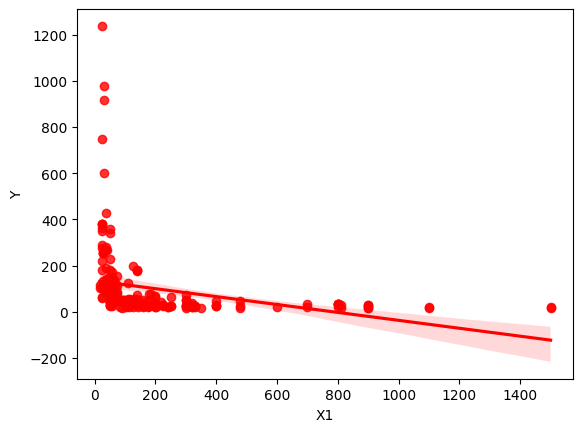

In [54]:
sns.regplot(x='X1',y='Y',data=df2,marker='o',color='red')
plt.show()

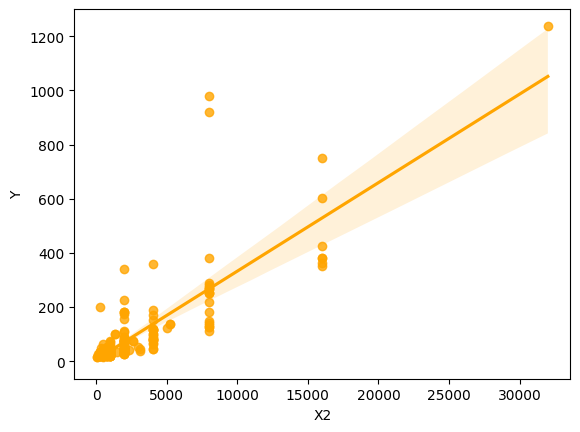

In [53]:
sns.regplot(x='X2',y='Y',data=df2,marker='o',color='orange')
plt.show()

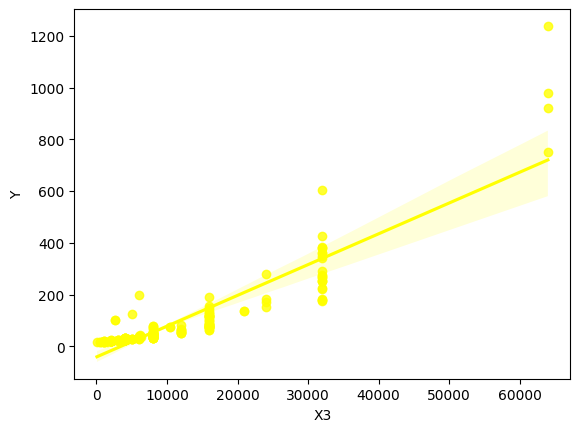

In [51]:
sns.regplot(x='X3',y='Y',data=df2,marker='o',color='yellow')
plt.show()

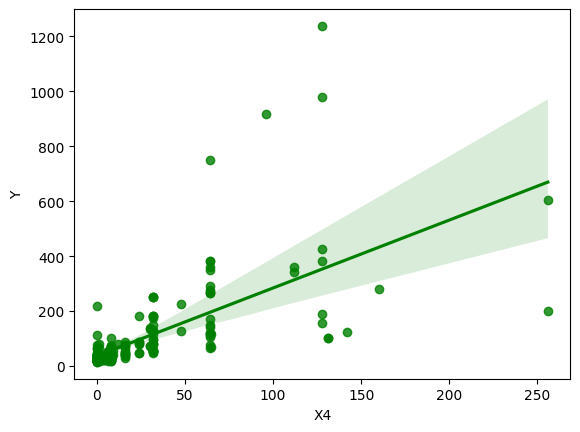

In [50]:
sns.regplot(x='X4',y='Y',data=df2,marker='o',color='green')
plt.show()

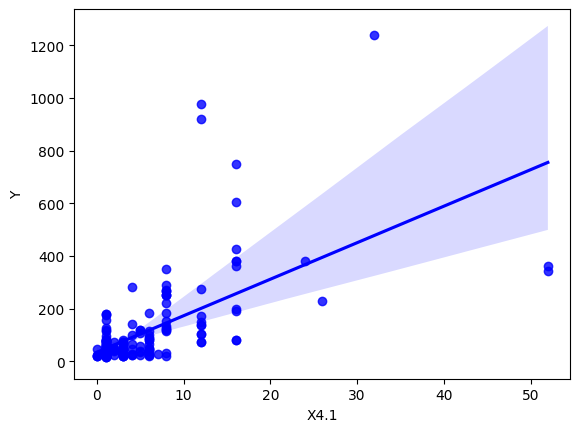

In [49]:
sns.regplot(x='X4.1',y='Y',data=df2,marker='o',color='blue')
plt.show()

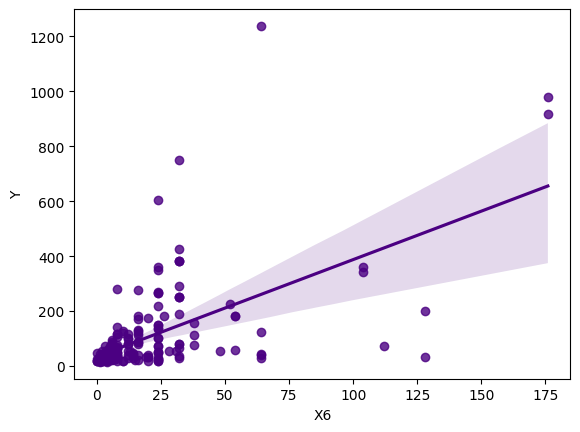

In [48]:
sns.regplot(x='X6',y='Y',data=df2,marker='o', color='indigo')
plt.show()

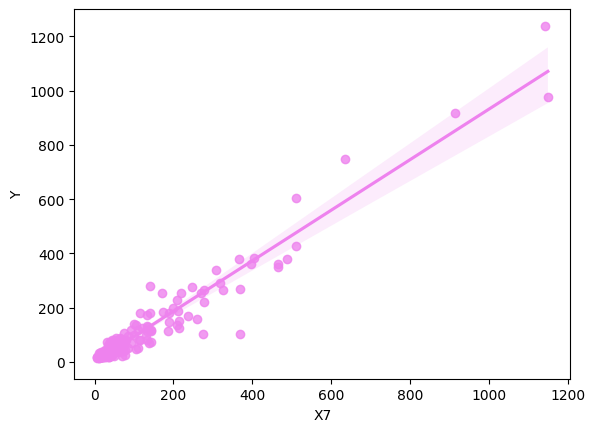

In [47]:
sns.regplot(x='X7',y='Y',data=df2,marker='o', color='violet')
plt.show()

**Data Preprocessing**

>> Changing the column name

In [57]:
df.rename(columns={'X1':'x1','X2':'x2','X3':'x3','X4':'x4','X4.1':'x4.1','X5':'x5','X6':'x6','X7':'x7','Y':'y'},inplace=True)

In [58]:
df.head()

,x1,x2,x3,x4,x4,x6,x7,y
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


# Model Fitting

In [59]:
X = df.drop('y',axis=1)
y = df['y']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
X_train.shape

(156, 7)

In [63]:
y_train.shape

(156,)

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(X_test)

# Evaluation – MSE, MAE, R 2

In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score:',r2_score(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8948938942935034
Mean Squared Error: 6568.52117553874
Mean Absolute Error: 32.67741125827239


# Accuracy low due to presence of meagre outliers.

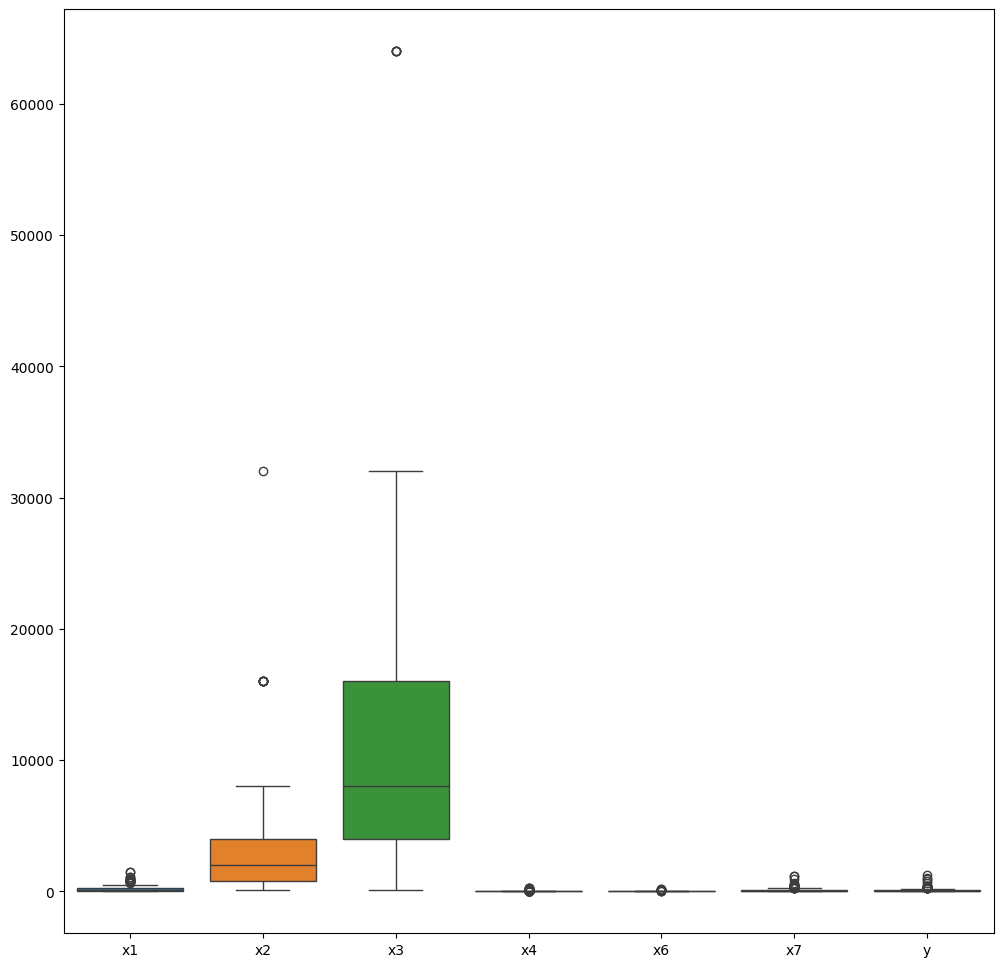

In [86]:
plt.figure(figsize=(12,12))
sns.boxplot(df)
plt.show()

Hyperparameter tuning

In [ ]:
from sklearn.

In [88]:
y_test.shape

(53,)

In [90]:
y_pred.shape

(53,)

# Model's Predicted Result

In [80]:
x2 = [125,256,6000,256,16,128,198]
x2 = np.array(x2)
x2 = x2.reshape(1,-1)
x2 = sc.transform(x2)
print(lr.predict(x2))

[167.91503104]


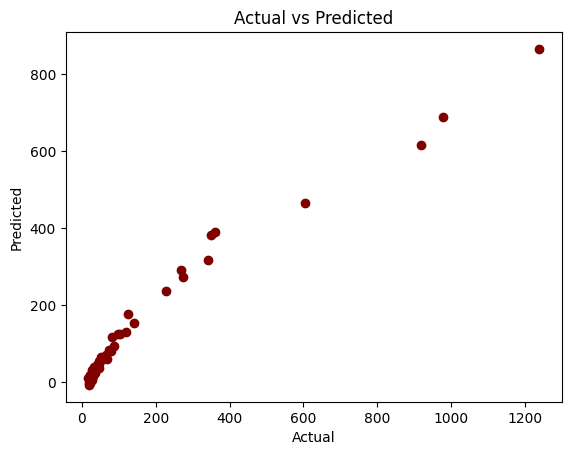

In [70]:
plt.scatter(y_test, y_pred , color='maroon')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# Mean of Residuals

# Homoscedasticity

# Normality

Mean of Residuals: 20.717874007197594


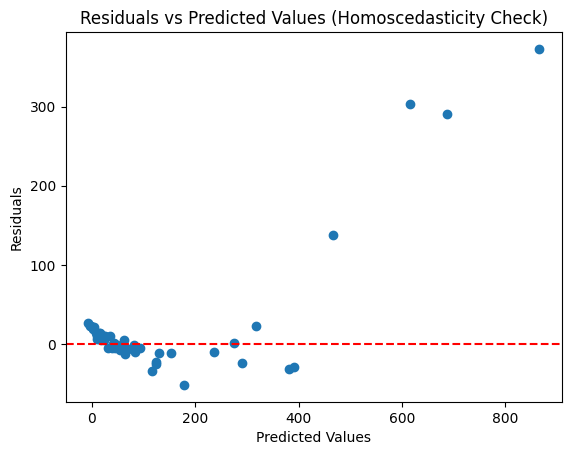

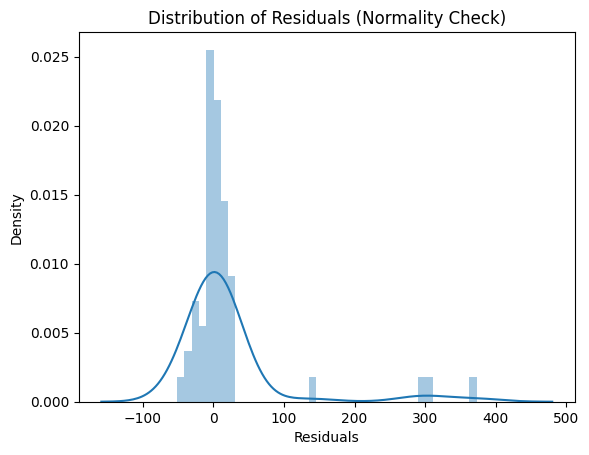

In [73]:

# a. Mean of Residuals
# b. Check for Homoscedasticity
# c. Check for Normality of error terms/residuals



# Calculate residuals
residuals = y_test - y_pred

print("Mean of Residuals:", np.mean(residuals))

# b. Check for Homoscedasticity
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Homoscedasticity Check)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# c. Check for Normality of error terms/residuals
sns.distplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals (Normality Check)")
plt.show()


# Autocorrelation of residuals

In [83]:
import statsmodels.api as sm

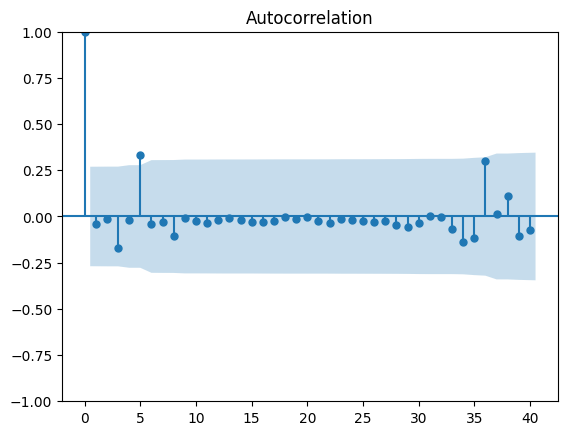

In [84]:
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

# Perfect multicollinearity

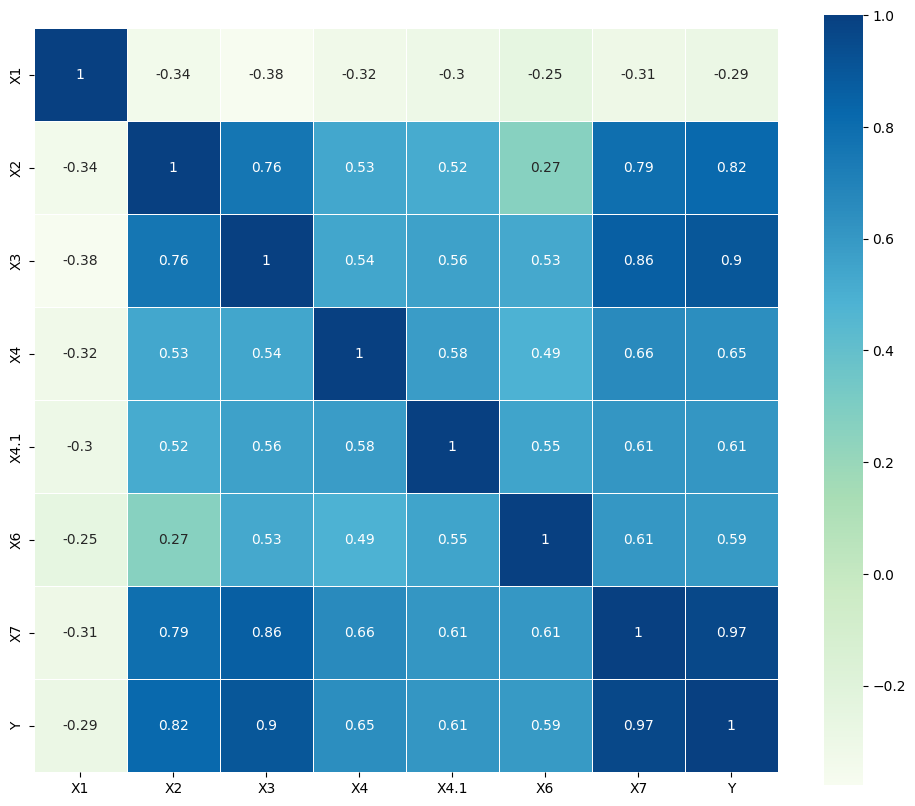

In [78]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(),annot=True,cmap='GnBu',linecolor='white',linewidths=0.5,square=True)
plt.show()

# Best independent variable

In [91]:
df2.corr()

,x1,x2,x3,x4,x4,x6,x7,y
x1,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
x2,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
x3,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
x4,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
x4,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
x6,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
x7,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
y,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


Solution: **The best independent variable here is X7 with collinearity of 0.97
the second best is x3 with 0.90**